# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

/Users/khalid/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 2: Read in your data set 

In [41]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print (df_raw.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [6]:
ls ../assets/

admissions.csv  images/


## Questions
#### Question 1. How many observations are in our dataset? 


In [42]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: There are 400 observations.

#### Question 2. Create a summary table

In [63]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: STD for GRE is larder the the STD GPA because the score range for GRE is greater; ranging from a 
min of 220 and a max of 800.  While GPA range from 2.26min to a max of 4.0.

#### Question 4. Drop data points with missing data


In [82]:
df_clean = df_raw.dropna()
df_clean.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [71]:
df_raw[df_raw.isnull().any(axis=1)]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


In [83]:
df_clean.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

In [85]:
df_clean[df_clean.isnull().any(axis=1)]

,admit,gre,gpa,prestige


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: I confirmed that the dropped data was correct by running the following:
1. df_raw[df_raw.isnull().any(axis=1)] => used to see missing data rows 
2. df_clean.count() => used compair to count defore dropped missing data rows  
3. df_clean[df_clean.isnull().any(axis=1)] => used to see missing data rows are still present
 

#### Question 6. Create box plots for GRE and GPA

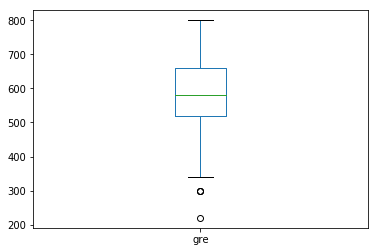

In [137]:
#boxplot 1
df_gre = df_raw[['gre']]
df_gre.plot(kind='box');

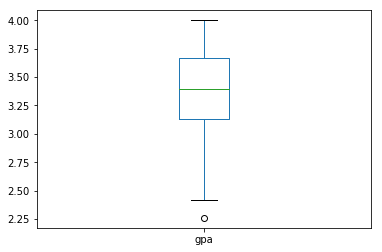

In [138]:
#boxplot 2 
df_gpa = df_raw[['gpa']]
df_gpa.plot(kind='box');

#### Question 7. What do this plots show?

Answer: this plot shows the medain, upper and lower quartiles and outliers 

#### Question 8. Describe each distribution 

1) Admin distribution
2) GRE distribution
3) GPA distribution
4) Prestige distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c19666a58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c19785898>]], dtype=object)

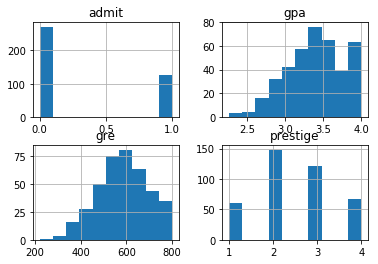

In [106]:
# plot the distribution of each variable
df_clean[['admit','gre','gpa','prestige']].hist()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: yes, for the most part; however, there seem to be a slight skew to the right for both the gpa and the gre scores.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Note sure if correction is need because as stated above data appears to be normal.  But you can use a Log10 or square root transformation to test for better normality.

#### Question 11. Which of our variables are potentially colinear? 

In [126]:
# create a correlation matrix for the data
df_clean_corr = df_clean.corr()
df_clean_corr

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


/Users/khalid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


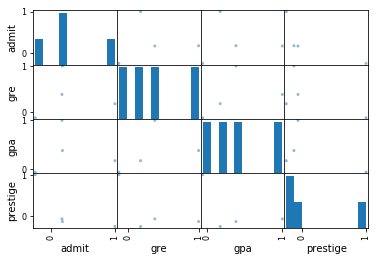

In [136]:
from pandas.tools.plotting import scatter_matrix as scatmx
scatmx(df_clean_corr);

#### Question 12. What did you find?

Answer: not sure if I understand but it appears to have no corralation

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

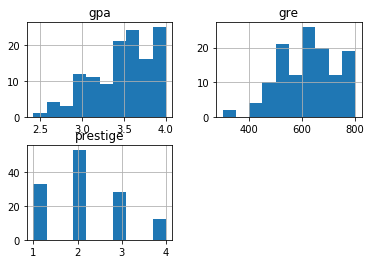

In [205]:
#---Students Admitted to Grad School
admitted = df_clean.admit == 1
df_admitted = df_clean[admitted]
df_admitted[['prestige','gpa','gre']].hist();

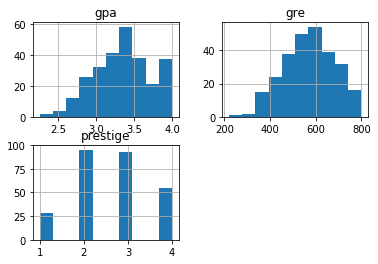

In [203]:
#---Students Not Admitted to Grad School
not_admitted = df_clean.admit == 0
df_not_admitted = df_clean[not_admitted]
#df_not_admitted.describe()
df_not_admitted[['prestige','gpa','gre']].hist();

Answer: use histergrams to test if there is a correlation between

#### Question 14. What is your hypothesis? 

Answer: Students that attended highly prestigest undergrand schools are more likely to be accecpted to grad school even if the GRE and GPA scores were low.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

The value could be estimated or guested.  

#### 2. Bonus: Log transform the skewed data

/Users/khalid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


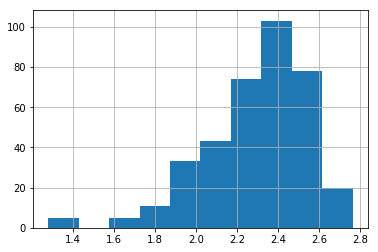

In [139]:
df_gre_log10 = np.log10((df_clean['gre'].max()-1)-(df_clean['gre']))
df_gre_log10.dropna().hist();

In [206]:
!pwd

/Users/khalid/GA/DAT-NYC-11.14.17/DAT-NYC-11.14.17/unit-projects/project-2/starter-code


#### 3. Advanced: Impute missing data